## building raster readers, tight boundary extractors and density checks

In [14]:
import fiona
from shapely import geometry, wkt
from shapely.geometry import shape
from shapely.ops import transform, cascaded_union
import numpy as np

import rasterio
from rasterio import features

import json
import geojson

from functools import partial
import pyproj
import utm

#import matplotlib.pyplot as plt

#%matplotlib inline

In [15]:
inputgeotiff="../../../test-grids/geotiff//grid1_1m.tiff"

In [16]:
dataset = rasterio.open(inputgeotiff)

In [17]:
plt.imshow(dataset.dataset_mask())
plt.colorbar()

NameError: name 'plt' is not defined

In [18]:
mask = dataset.dataset_mask()

In [19]:
dataset.nodatavals

(3.4028234663852886e+38,)

In [20]:
dataset.nodata

3.4028234663852886e+38

In [21]:
mask.shape

(6799, 13781)

In [22]:
thedata = mask[mask <= 0]

In [23]:
thedata.shape

(76246078,)

In [24]:
datahere = mask[mask > 0]

In [25]:
mask[mask > 0].shape[0]

17450941

In [26]:
datahere.shape

(17450941,)

In [27]:
datahere.shape[0]

17450941

In [28]:
dataset.transform

Affine(1.0, 0.0, 510991.5,
       0.0, -1.0, 5658080.5)

In [29]:
dataset.dataset_mask()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
dataset.meta["crs"]

CRS.from_dict(init='epsg:32755')

In [31]:
dataset.crs.to_epsg()

32755

In [41]:
if dataset.crs.to_epsg() != 4326:
    print('notwgs')

notwgs


In [ ]:
from 

In [33]:
bbox = dataset.bounds

In [34]:
bbox[2] - bbox[0]

13781.0

In [35]:
dataset.units

('m',)

In [36]:
dataset.width

13781

In [37]:
dataset.height

6799

In [60]:
dataset.width * dataset.height

93697019

In [67]:
dataset.crs.to_proj4()

'+init=epsg:32755'

In [39]:
nodata = len(np.ravel(np.where(dataset.dataset_mask() <= 0)))

In [40]:
data = len(np.ravel(np.where(dataset.dataset_mask() > 0)))

In [89]:
data + nodata

187394038

In [47]:
data

34901882

In [48]:
nodata

152492156

In [49]:
boundaries = features.shapes(dataset.dataset_mask(), transform=dataset.transform)


In [50]:
listofpolygons = [shape(bound[0]) for bound in boundaries]

In [51]:
for bound in boundaries:
    listofpolygons.append(shape(bound[0]))

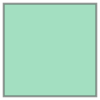

In [52]:
listofpolygons[0]

In [53]:
multipoly = cascaded_union(listofpolygons[:-1])

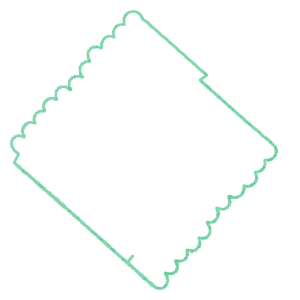

In [54]:
multipoly.boundary

In [55]:
multipoly.area

17465008.0

In [108]:
datahere.shape

(17450941,)

In [27]:
multipoly.centroid.xy

(array('d', [495022.0009419228]), array('d', [5623911.603936483]))

In [ ]:
dataset.close()

In [ ]:
import fiona
import json


In [ ]:
inputfile = '../tests/geotiff-test-grid1.shp'
with fiona.open(inputfile, 'r') as jsonfile:
    this = jsonfile[0]['geometry']
    that = jsonfile[0]
    print(jsonfile.crs)

In [ ]:
this

In [ ]:
that.crs

In [ ]:
str(json.dumps(this))

In [ ]:
inputfile_s = '../tests/testshp.shp'
with fiona.open(inputfile_s, 'r') as shpfile:
    this = shpfile[0]['geometry']
    that = shpfile[0]
    other = shpfile.crs

In [ ]:
this

In [ ]:
that.values()

In [ ]:
other

In [42]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/Users/adam/Spatialised/frontierSI/qa4mbes-data-pipeline/qa4mbes/')

In [58]:
import getgridcoverage
from geotransforms import tolatlon

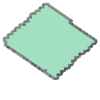

In [68]:
tolatlon(coverage, dataset.crs.to_proj4())

In [44]:
coverage = getgridcoverage.getgridcoverage('/mnt/bigdata/frontierSI/sampledata/raster/grid1_1m.tiff')

RasterioIOError: /mnt/bigdata/frontierSI/sampledata/raster/grid1_1m.tiff: No such file or directory

In [56]:
coverage = multipoly

In [5]:
import getpointcoverage

In [6]:
pointcoverage = getpointcoverage.getpointcoverage('../tests/lasdata/4819-100000lines-nocrs.laz')

In [7]:
type(pointcoverage)

str

In [ ]:
dataset.crs.to_string()

In [ ]:
if dataset.crs.to_epsg() != 4326:
    print('transforming')
    thepoly = tolatlon(multipoly, dataset.crs.to_())

In [ ]:
thepoly